In [1]:
!pip install tensorflow

In [2]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [87]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV  
from scikeras.wrappers import KerasClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers


In [4]:
# The dataset is pre-split to 60,000 training and 10,000 testing
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
# Normalize the images from the original range (0-255) to (0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [49]:
# Reshape the images to be compatible with CNN. -1 lets NumPy manually calculate the appropriate number of images, 1 signle-channel -> greyscale, 28x28 pixels
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#Applay data Augmentation to reduce overfitting
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotate images by up to 15 degrees
    width_shift_range=0.1,    # Shift images horizontally by up to 10% of width
    height_shift_range=0.1,   # Shift images vertically by up to 10% of height
    shear_range=0.1,          # Shear angle in counter-clockwise direction
    zoom_range=0.1,           # Zoom in/out by up to 10%
    horizontal_flip=True,     # Randomly flip images horizontally
    fill_mode='nearest'       # Fill in missing pixels after transformations
)
datagen.fit(x_train)

In [176]:
# Build the CNN model 
def create_model(learning_rate=0.001): 
    model = keras.Sequential([
        # First Convolutional Block
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.25),
        # Second Convolutional Block
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
         keras.layers.Dropout(0.3),
        # Third Convolutional Block
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
         keras.layers.Dropout(0.4),
        # Flatten and Fully Connected Layers
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.4),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.25),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model with the Adam optimizer
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create KerasClassifier wrapper to perform hyperparameter tuning (via grid search)
model = KerasClassifier( build_fn=create_model,verbose=1,epochs=20, batch_size=64,learning_rate=0.001)
# Define parameter grid of hyperparamter that we eant to tune
param_grid = {
    'learning_rate': [0.01, 0.001]
}

# Create and run GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=2,
    n_jobs=1,  
    verbose=2,
    scoring='accuracy',
    refit=True
)

# Fit the grid search 
grid_result = grid_search.fit(x_train, y_train)


Fitting 2 folds for each of 2 candidates, totalling 4 fits


C:\Users\noura\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\noura\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.5551 - loss: 1.2254
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.7456 - loss: 0.7219
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7657 - loss: 0.6572
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7791 - loss: 0.6226
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7862 - loss: 0.5970
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7888 - loss: 0.6035
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7963 - loss: 0.5744
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8045 - loss: 0.5624
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7978 - loss: 0.5740
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8105 - loss: 0.5485
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8129 - loss: 0.5620
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━

C:\Users\noura\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\noura\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8414 - loss: 0.4399
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.8448 - loss: 0.4325
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8479 - loss: 0.4296
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8482 - loss: 0.4185
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8526 - loss: 0.4065
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.8575 - loss: 0.3861
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step
[CV] END ................................learning_rate=0.001; total time= 4.8min


C:\Users\noura\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\noura\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.4890 - loss: 1.5033
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.7471 - loss: 0.7018
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.7848 - loss: 0.5932
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8095 - loss: 0.5310
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8563 - loss: 0.4036
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8547 - loss: 0.4009
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8629 - loss: 0.3905
Epoch 13/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.8617 - loss: 0.3844
Epoch 14/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8657 - loss: 0.3781
Epoch 15/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.8716 - loss: 0.3621
Epoch 16/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.5678 - loss: 1.2575
Epoch 2/20
938/938 ━━━━━━━

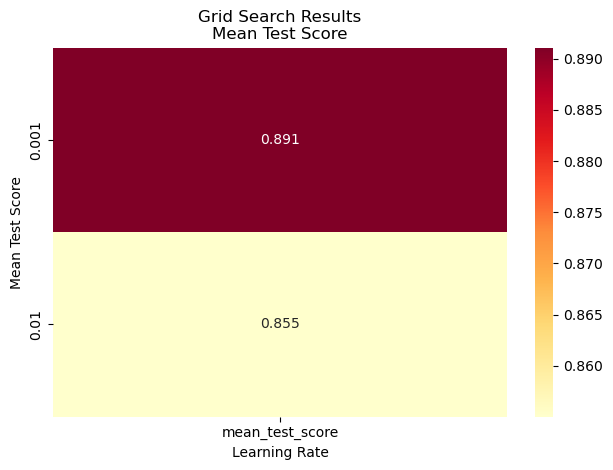


Grid Search Results:
                     params  mean_test_score  std_test_score  rank_test_score
1  {'learning_rate': 0.001}         0.891083        0.001850                1
0   {'learning_rate': 0.01}         0.855017        0.000817                2

Best Parameters: {'learning_rate': 0.001}
Best Score: 0.8910833333333333


In [180]:
# Plot grid search results
results = pd.DataFrame(grid_result.cv_results_)
pivot_table = results.pivot_table(
    values='mean_test_score',
    index='param_learning_rate',
    aggfunc='mean'
)
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='YlOrRd')
plt.title('Grid Search Results\nMean Test Score')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Test Score')
plt.tight_layout()
plt.show()

# Thoe model with the best hyperparamters with the highest performance on the validation set during the grid search.
best_model = grid_result.best_estimator_
# 7. Print results of the grid
print("\nGrid Search Results:")
results_df = pd.DataFrame(grid_result.cv_results_)
# test score is the value of the performance measure(accuracy) on some validation fold
results_df = results_df.sort_values(by='rank_test_score')
# The mean_test_score is the average accuracy across all validation folds for each hyperparameter combination.
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

print("\nBest Parameters:", grid_result.best_params_)
print("Best Score:", grid_result.best_score_)

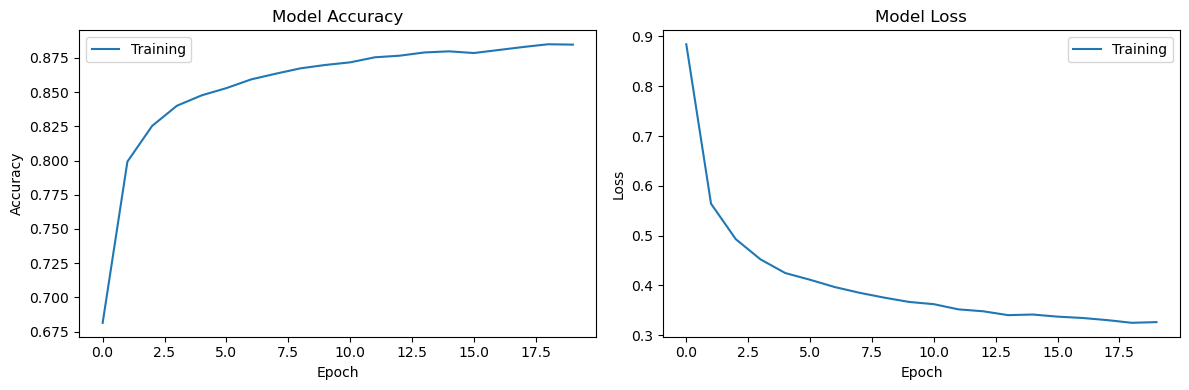

In [188]:
# Plot the full training set history 
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(best_model.history_['accuracy'], label='Training')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_model.history_['loss'], label='Training')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8965 - loss: 0.2897

Final Test Accuracy: 0.8976

Final Test loss: 0.2874
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


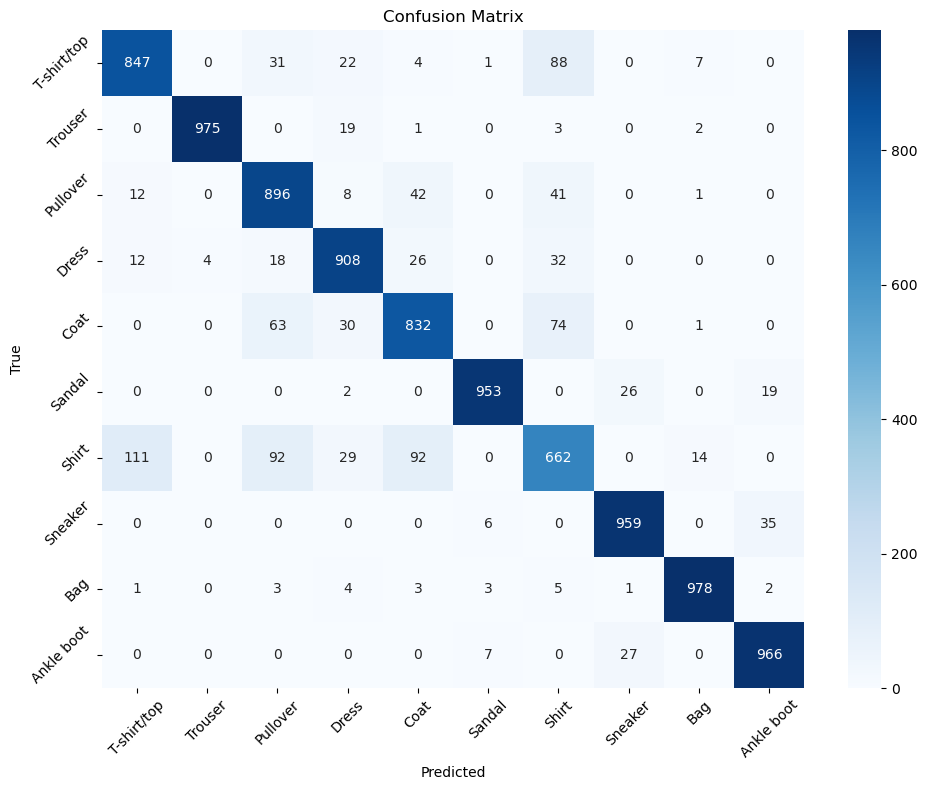


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.85      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.81      0.90      0.85      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.73      0.66      0.70      1000
     Sneaker       0.95      0.96      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [184]:
# Evaluate final model
test_loss, test_accuracy = best_model.model_.evaluate(x_test, y_test)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print(f"\nFinal Test loss: {test_loss:.4f}")

# Generate predictions and confusion matrix
y_pred = best_model.model_.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Plot confusion matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Create results visualization
plt.figure(figsize=(12, 6))

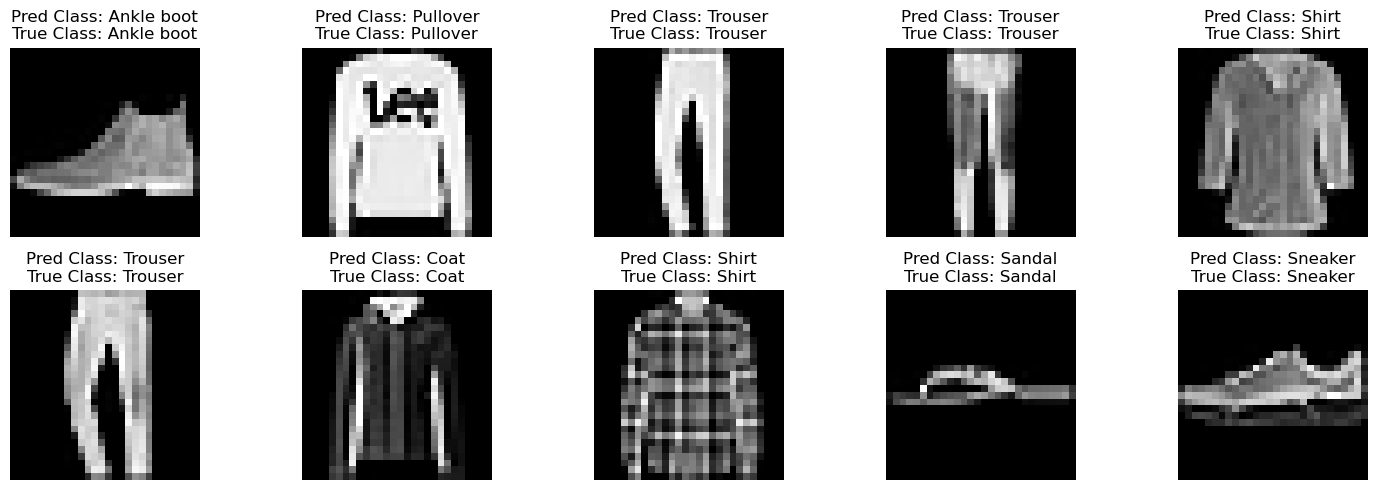

In [186]:
# Plot sample predictions
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred_class = class_names[y_pred_classes[i]]
    true_class = class_names[y_test[i]]
    plt.title(f'Pred Class: {pred_class}\nTrue Class: {true_class}')
    plt.axis('off')
plt.tight_layout()
plt.show()